In [8]:
import numpy as np 
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.utils import check_random_state
from sklearn import tree

# Visualizar árboles
from IPython.display import Image
import pydotplus
from six import StringIO

# UMAP para la reducción de dimensionalidad
import umap

# Visualización
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

%matplotlib inline

# Loading and checking the data

In [9]:
# we load the data set and check how does it look like
hipotecas = pd.read_csv("hipotecas.csv")
hipotecas.head(10)

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,hipoteca
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1
5,5692,911,11,325,50875,360863,1,4,5,1
6,6830,1298,345,309,46761,429812,1,1,5,1
7,6470,1035,39,782,57439,606291,0,0,1,0
8,6251,1250,209,571,50503,291010,0,0,3,1
9,6987,1258,252,245,40611,324098,2,1,7,1


We see that we have 10 different variables, some categorical and some quantitative.
Let's check if we are missing any data.

In [10]:
hipotecas.isnull().sum()

ingresos          0
gastos_comunes    0
pago_coche        0
gastos_otros      0
ahorros           0
vivienda          0
estado_civil      0
hijos             0
trabajo           0
hipoteca          0
dtype: int64

Good to go as we are have no null values.

# Study of the data

We can run this line of code to get a general overview of the statistical properties of the selected columns, such as the mean, standard deviation, and other descriptive metrics. This helps us understand the distribution of our data and determine whether it is skewed or not.
Take into account that we run this only on the quantitative variables.

In [13]:
hipotecas.iloc[:,[0,1,2,3,4,5,7]].describe().T

,count,mean,std,min,25%,50%,75%,max
ingresos,202.0,4958.995050,1682.862556,2008.0,3513.75,4947.5,6374.50,7984.0
gastos_comunes,202.0,971.584158,272.106351,384.0,766.75,968.0,1165.25,1585.0
pago_coche,202.0,211.742574,124.940754,0.0,99.00,208.5,318.75,448.0
gastos_otros,202.0,515.425743,168.103075,201.0,383.25,522.5,656.75,828.0
ahorros,202.0,38749.668317,17365.231870,10319.0,24964.25,38523.0,52150.75,69934.0
vivienda,202.0,373349.638614,136371.525622,176553.0,274810.00,340783.5,444482.00,669540.0
hijos,202.0,1.232673,1.367833,0.0,0.00,1.0,2.00,4.0


Let's examine the data we have with some bar plots and histograms which will help us understand how the variables work together.

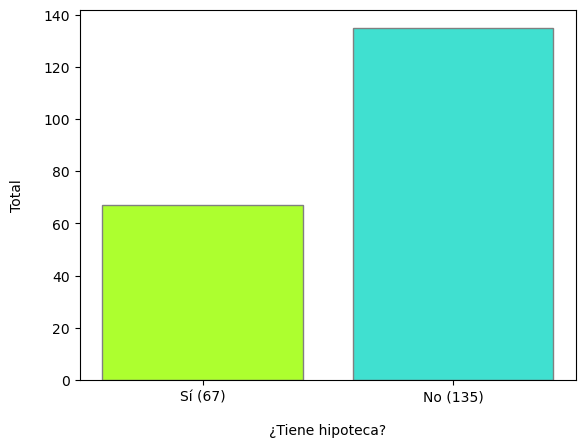

In [ ]:
# hacemos un diagrama de barras 
labels = [hipotecas["hipoteca"].value_counts()[1], 
          hipotecas["hipoteca"].value_counts()[0]]
values = np.arange(len(labels))
# creamos el plot
plt.bar(values, labels, color=("greenyellow","turquoise"), edgecolor="grey")
# diseñamos los nombres para el eje x
plt.xticks(values, ('Yes ('+str(hipotecas["hipoteca"].value_counts()[1])+')',
                   'No ('+str(hipotecas["hipoteca"].value_counts()[0])+')'))
plt.xlabel("Do they gave them have a mortage?", labelpad=14)
plt.ylabel("Total", labelpad=14,)
plt.show()

The variable is our dependent variable. We see that the outcome "No" to give them a variable is almost the double as the outcome "Yes" to give them a variable.
Let see if we can determine which variables have a bigger effect on this decision.

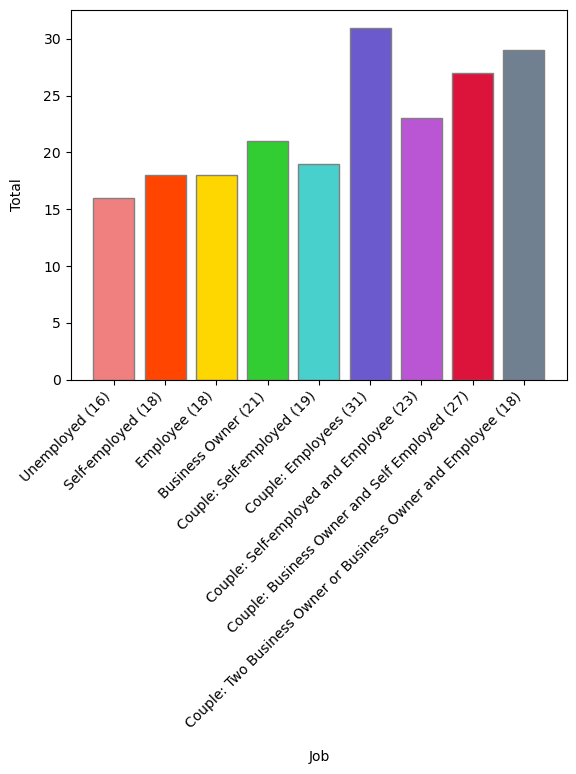

In [ ]:
# defining the plot values
# we have Job under a categorical variable. We can just sum how many of each occurrences are of each kind of work to plot them in a bar plot
labels = [hipotecas["trabajo"].value_counts()[0], 
          hipotecas["trabajo"].value_counts()[1],
          hipotecas["trabajo"].value_counts()[2],
          hipotecas["trabajo"].value_counts()[3],
          hipotecas["trabajo"].value_counts()[4],
          hipotecas["trabajo"].value_counts()[5],
          hipotecas["trabajo"].value_counts()[6],
          hipotecas["trabajo"].value_counts()[7],
          hipotecas["trabajo"].value_counts()[8]]
values = np.arange(len(labels))
# creating the plot
plt.bar(values, labels, 
        color=("lightcoral","orangered","gold","limegreen",
               "mediumturquoise","slateblue","mediumorchid","crimson","slategrey"), 
        edgecolor="grey")
# designing the plot info
plt.xticks(values, ('Unemployed ('+str(hipotecas["trabajo"].value_counts()[0])+')',
                   'Self-employed ('+str(hipotecas["trabajo"].value_counts()[1])+')',
                   'Employee ('+str(hipotecas["trabajo"].value_counts()[2])+')',
                   'Business Owner ('+str(hipotecas["trabajo"].value_counts()[3])+')',
                   'Couple: Self-employed ('+str(hipotecas["trabajo"].value_counts()[4])+')',
                   'Couple: Employees ('+str(hipotecas["trabajo"].value_counts()[5])+')',
                   'Couple: Self-employed and Employee ('+str(hipotecas["trabajo"].value_counts()[6])+')',
                   'Couple: Business Owner and Self Employed ('+str(hipotecas["trabajo"].value_counts()[7])+')',
                   'Couple: Two Business Owner or Business Owner and Employee ('+str(hipotecas["trabajo"].value_counts()[2])+')'),
           rotation=45, ha='right')
plt.xlabel("Job", labelpad=14)
plt.ylabel("Total", labelpad=14)
plt.show()

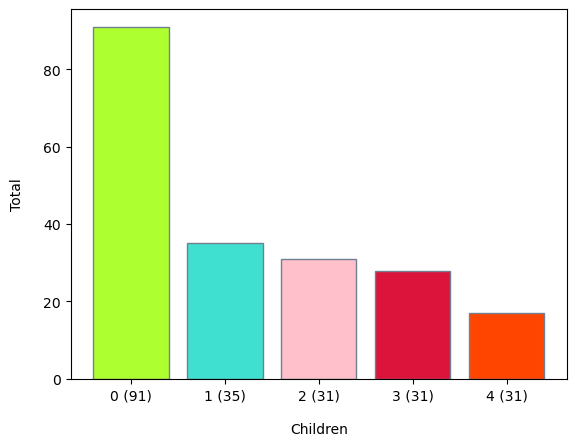

In [16]:
# we repeat the same process as before to deal with the "children" variable
labels = [hipotecas["hijos"].value_counts()[0], 
          hipotecas["hijos"].value_counts()[1],
          hipotecas["hijos"].value_counts()[2],
          hipotecas["hijos"].value_counts()[3],
          hipotecas["hijos"].value_counts()[4]]
values = np.arange(len(labels))
# creamos el plot
plt.bar(values, labels, color=("greenyellow","turquoise","pink","crimson","orangered"),edgecolor="slategrey")
# diseñamos los nombres para el eje x
plt.xticks(values, ('0 ('+str(hipotecas["hijos"].value_counts()[0])+')',
                   '1 ('+str(hipotecas["hijos"].value_counts()[1])+')',
                   '2 ('+str(hipotecas["hijos"].value_counts()[2])+')',
                   '3 ('+str(hipotecas["hijos"].value_counts()[2])+')',
                   '4 ('+str(hipotecas["hijos"].value_counts()[2])+')'))
plt.xlabel("Children", labelpad=14)
plt.ylabel("Total", labelpad=14)
plt.show()

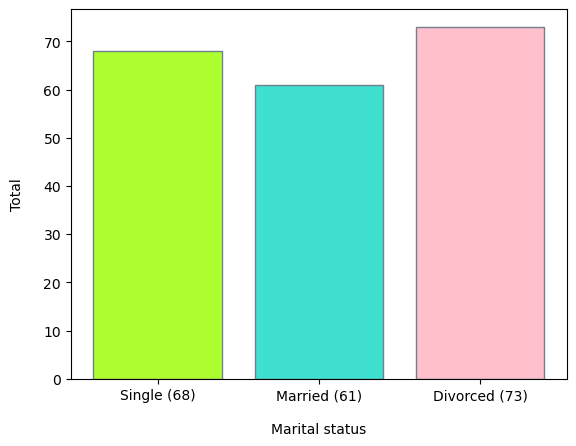

In [17]:
# and the same again with the marital status
labels = [hipotecas["estado_civil"].value_counts()[0], 
          hipotecas["estado_civil"].value_counts()[1],
          hipotecas["estado_civil"].value_counts()[2]]
values = np.arange(len(labels))
# creamos el plot
plt.bar(values, labels, color=("greenyellow","turquoise","pink"),edgecolor="slategrey")
# diseñamos los nombres para el eje x
plt.xticks(values, ('Single ('+str(hipotecas["estado_civil"].value_counts()[0])+')',
                   'Married ('+str(hipotecas["estado_civil"].value_counts()[1])+')',
                   'Divorced ('+str(hipotecas["estado_civil"].value_counts()[2])+')'))
plt.xlabel("Marital status", labelpad=14)
plt.ylabel("Total", labelpad=14)
plt.show()

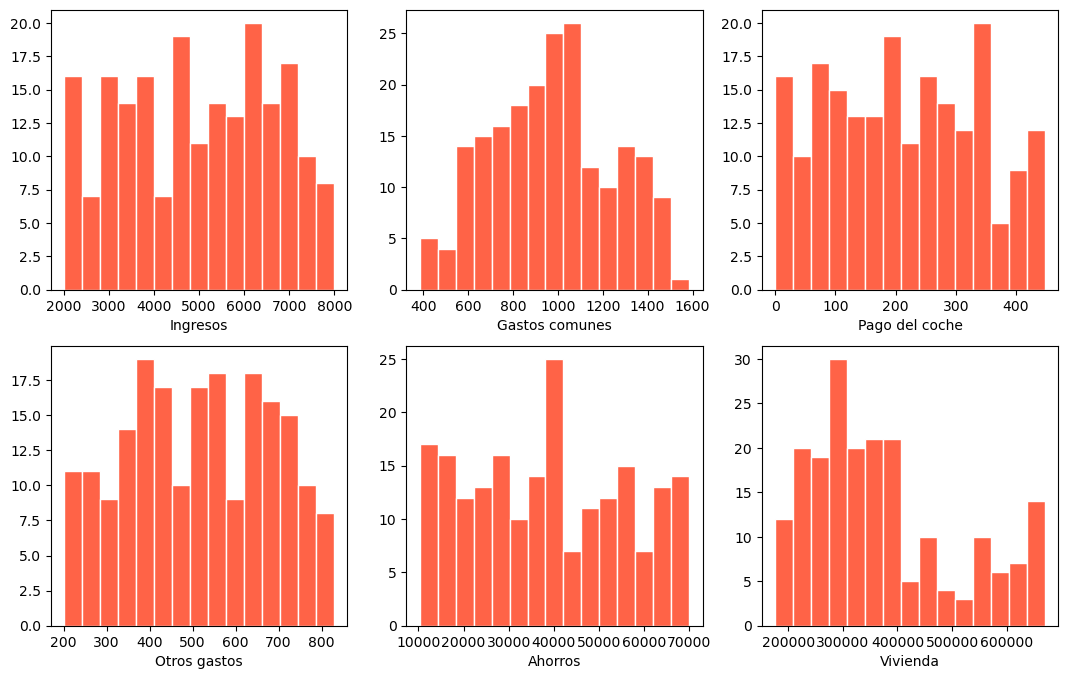

In [18]:
# with the quantitative variables we can do some histograms and check how values are distributed
f = plt.figure(figsize=(13, 8))
# ingresos
f.add_subplot(231)
plt.hist(hipotecas['ingresos'], color = "tomato", edgecolor='white', bins = 15)
plt.xlabel("Ingresos")

# gastos comunes
f.add_subplot(232)
plt.hist(hipotecas['gastos_comunes'], color = "tomato", edgecolor='white', bins = 15)
plt.xlabel("Gastos comunes")

# pagos del coche
f.add_subplot(233)
plt.hist(hipotecas['pago_coche'], color = "tomato", edgecolor='white', bins = 15)
plt.xlabel("Pago del coche")

# otros gastos
f.add_subplot(234)
plt.hist(hipotecas['gastos_otros'], color = "tomato", edgecolor='white', bins = 15)
plt.xlabel("Otros gastos")

# ahorros
f.add_subplot(235)
plt.hist(hipotecas['ahorros'], color = "tomato", edgecolor='white', bins = 15)
plt.xlabel("Ahorros")

# vivienda
f.add_subplot(236)
plt.hist(hipotecas['vivienda'], color = "tomato", edgecolor='white', bins = 15)
plt.xlabel("Vivienda")

plt.show()

# Giving shape to the data

We are going to simplify our data a bit by grouping some variables together.
They are some variables that can be summarize in one. For example "car_payment", "common_expenses", and "other_expenses" can be grouped under "expenses".

In [19]:
hipotecas['gastos'] = (hipotecas['pago_coche'] + hipotecas['gastos_comunes'] + hipotecas['gastos_otros'])
hipotecas.head()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,hipoteca,gastos
0,6000,1000,0,600,50000,400000,0,2,2,1,1600
1,6745,944,123,429,43240,636897,1,3,6,0,1496
2,6455,1033,98,795,57463,321779,2,1,8,1,1926
3,7098,1278,15,254,54506,660933,0,0,3,0,1547
4,6167,863,223,520,41512,348932,0,0,3,1,1606


The money that have to be finance by the bank can be obtained by detracting the "savings" from the price of the "house"

In [20]:
hipotecas['financiar'] = hipotecas['vivienda'] - hipotecas['ahorros']
hipotecas.head()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,hipoteca,gastos,financiar
0,6000,1000,0,600,50000,400000,0,2,2,1,1600,350000
1,6745,944,123,429,43240,636897,1,3,6,0,1496,593657
2,6455,1033,98,795,57463,321779,2,1,8,1,1926,264316
3,7098,1278,15,254,54506,660933,0,0,3,0,1547,606427
4,6167,863,223,520,41512,348932,0,0,3,1,1606,307420


In [21]:
# we drop the colums that we do not need anymore.
df = hipotecas.drop(['gastos_comunes','gastos_otros','pago_coche','ahorros','vivienda'], axis = 1)
df.head()
# we have now a new data frame with the values we need
df_analysis = df[["ingresos","gastos","financiar"]]

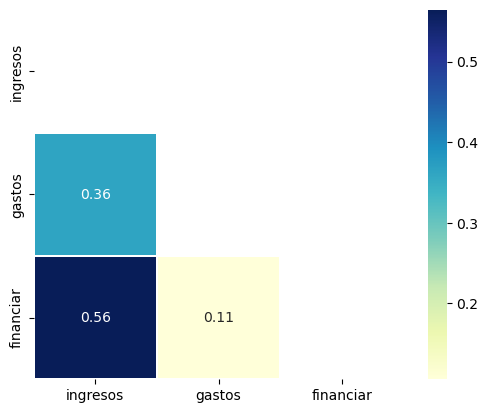

In [22]:
# we create a correlation matrix to see how the relationship between the variables is
corr = df_analysis.corr().round(4)
# and we display it graphically
mask = np.triu(np.ones_like(corr, dtype=bool))
# the matrix
sns.heatmap(corr, mask=mask, annot = True, cmap = 'YlGnBu', linewidths = 0.2, square = True)
plt.show()

We see there is a strong connection between the money they have to finance and the income they have.
Also, the expenses are pretty related to the income.

We also want to check the relationship between the categorical variables and if they get or not a mortage.

C:\Users\iredi\AppData\Local\Temp\ipykernel_10844\2952885769.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Single","Married","Divorced"])


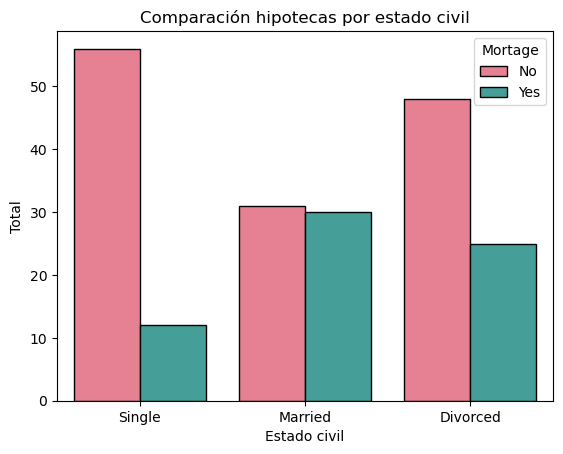

In [ ]:
# we create a dataframa with the two variables we need
x = df.groupby(['hipoteca','estado_civil']).size().to_frame('occurences').reset_index()
sns.set_palette("Set2", 1)
# here we use sns library and we do not need to sum the occurrences manually, we just put in in the y
ax = sns.barplot(x='estado_civil', y='occurences', hue='hipoteca', edgecolor = "black", data=x)
ax.set(xlabel='Marital status', ylabel='Total', title='Comparisson between mortages by marital status')
ax.set_xticklabels(["Single","Married","Divorced"])
h, l = ax.get_legend_handles_labels()
labels=["No","Yes"]
ax.legend(h, labels, title="Mortage")
plt.show()

As we can see, it seems single people do not get much mortages, as well as divorced people. However, being married is neither a great factor, since the negative values shrink, but the possitve values are similar to the ones in divorced.

C:\Users\iredi\AppData\Local\Temp\ipykernel_10844\1725370804.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Sin empleo","Autónomo","Empleado","Empresario","Pareja: autónomos",


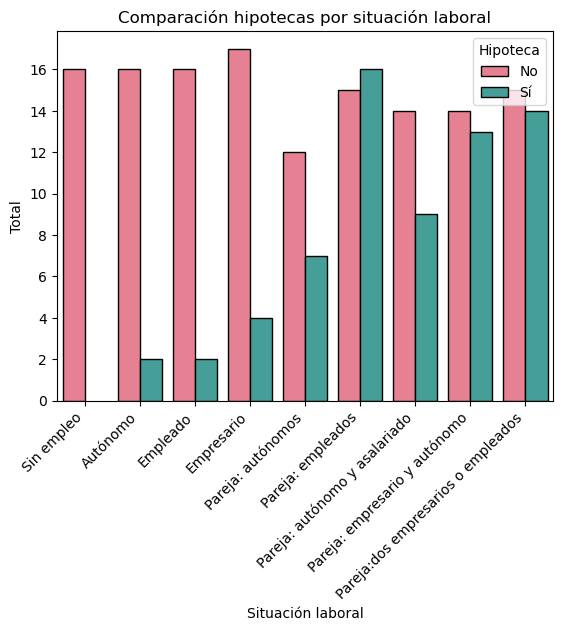

In [ ]:
# we repeat the same process for the job variable
x = df.groupby(['hipoteca','trabajo']).size().to_frame('occurences').reset_index()
sns.set_palette("Set2", 1)
ax=sns.barplot(x='trabajo', y='occurences', hue='hipoteca', edgecolor = "black", data=x)
ax.set(xlabel='Situación laboral', ylabel='Total', title='Comparación hipotecas por situación laboral')
ax.set_xticklabels(["Sin empleo","Autónomo","Empleado","Empresario","Pareja: autónomos",
                    "Pareja: empleados","Pareja: autónomo y asalariado","Pareja: empresario y autónomo",
                    "Pareja:dos empresarios o empleados"],
                   rotation=45, ha='right')
h, l = ax.get_legend_handles_labels()
labels=["No","Sí"]
ax.legend(h, labels, title="Hipoteca")
plt.show()

Again, we see that the no values are always pretty high accros all job situations. But the possitive values increase with the different job situation.

In [ ]:
x = df.groupby(['hipoteca','hijos']).size().to_frame('occurences').reset_index()
sns.set_palette("Set2", 1)
ax=sns.barplot(x='hijos', y='occurences', hue='hipoteca', edgecolor = "black", data=x)
ax.set(xlabel='Hijos', ylabel='Total', title='Comparación hipotecas por hijos')
ax.set_xticklabels(["0","1","2","3","4"])
h, l = ax.get_legend_handles_labels()
labels=["No","Sí"]
ax.legend(h, labels, title="Hipoteca")
plt.show()

In [ ]:
x = df.groupby(['hipoteca','ingresos']).size().to_frame('occurences').reset_index()
fig = sns.histplot(
    x, x="ingresos", hue="hipoteca", 
    stat="density", common_norm=False, alpha=0.5
)
fig.legend(labels=['No','Sí'])
plt.show()

In [ ]:
x = df.groupby(['hipoteca','gastos']).size().to_frame('occurences').reset_index()
fig = sns.histplot(
    x, x="gastos", hue="hipoteca", 
    stat="density", common_norm=False, alpha=0.5
)
fig.legend(labels=['No','Sí'])
plt.show()

In [ ]:
x = df.groupby(['hipoteca','financiar']).size().to_frame('occurences').reset_index()
fig = sns.histplot(
    x, x="financiar", hue="hipoteca", 
    stat="density", common_norm=False, alpha=0.5
)
fig.legend(labels=['No','Sí'])
plt.show()

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['estado_civil']]).toarray())
df = df.join(enc_df)
df.rename(columns={0: "soltero", 1: "casado", 2: "divorciado"}, inplace=True)
df.drop(columns=['estado_civil'], inplace=True)  # Optional: Drop original column
df.head()


In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['trabajo']]).toarray())
df = df.join(enc_df)
df.rename(columns={0: "sin empleo", 1: "autónomo", 2: "empleado", 3: "empresario",
                  4: "pareja: autónomos", 5: "pareja: empleados", 6: "pareja: autónomo y asalariado",
                  7: "pareja: empresario y autónomo", 8: "pareja: dos empresarios / empresario y empleado"}, inplace=True)
df.drop(columns=['trabajo'], inplace=True)
df.head()

In [ ]:
df=df[["ingresos","gastos","financiar","hijos","soltero","casado","divorciado","sin empleo","autónomo","empleado",
     "pareja: autónomos","pareja: empleados","pareja: autónomo y asalariado","pareja: empresario y autónomo",
      "pareja: dos empresarios / empresario y empleado","hipoteca"]]
df.head(1)

In [ ]:
x = df.iloc[:,:15]
y = df['hipoteca']
y = y.values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 24)

In [ ]:
clt = DecisionTreeClassifier(max_depth = 5)
clt.fit(X_train, y_train)
y_pred = clt.predict(X_test)

text_representation = tree.export_text(clt)
print(text_representation)

In [ ]:
z = X_train.columns
y=clt.feature_importances_
print(pd.DataFrame(y, z))

In [ ]:
# evaluamos modelo
print('Accuracy del Tree Classifier en training set: {:.2f}'.format(clt.score(X_train, y_train)))
print('Accuracy del Tree Classifier en test set: {:.2f}'.format(clt.score(X_test, y_test)))

print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
      
print("Classification report:")
print(classification_report(y_test, y_pred))

In [ ]:
fn=["ingresos","gastos","financiar","hijos","soltero","casado","divorciado","sin empleo","autónomo","empleado",
     "pautó","pempl","pautó/asala","pempre/autó",
      "pempre/emprempl"]
cn=["0","1"]
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clt, 
                   feature_names=fn,  
                   class_names=cn,
                   filled=True)
plt.show()

In [ ]:
tuned_parameters = [{'max_depth': [8,9,10,11,12],
                     'n_estimators': [50,100,200]}]

gs = GridSearchCV(
    RandomForestClassifier(),
    tuned_parameters,
    verbose = 1,
    cv = 3,
    n_jobs = -1
)

gs_results = gs.fit(X_train, y_train)

In [ ]:
print("El mejor párametro es:",gs_results.best_params_)

In [ ]:
rf = RandomForestClassifier(n_estimators = 200, max_depth = 12)
rf.fit(X_train, y_train);

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
# evaluamos modelo
print('Accuracy del Tree Classifier en training set: {:.2f}'.format(rf.score(X_train, y_train)))
print('Accuracy del Tree Classifier en test set: {:.2f}'.format(rf.score(X_test, y_test)))

print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
      
print("Classification report:")
print(classification_report(y_test, y_pred))

In [ ]:
z = X_train.columns
y=rf.feature_importances_
print(pd.DataFrame(y, z))

In [ ]:
casos = {'ingresos': [2000,6000,9000], 'gastos': [500,3400,2250], 'financiar': [200000,320000,39000],
        'hijos': [0,2,1], 'soltero': [0,0,1], 'casado': [1,1,0], 'divorciado': [0,0,0], 'sin empleo': [0,0,0],
        'autónomo': [0,0,1], 'empleado': [0,0,0], 'pareja: autónomos': [0,0,0], 'pareja: empleados': [0,0,0],
        'pareja: autónomo y asalariado': [0,1,0], 'pareja: empresario y autónomo': [0,0,0], 
        'pareja: dos empresarios / empresario y empleado': [1,0,0]}

casos = pd.DataFrame(casos)
casos

In [ ]:
y_pred = rf.predict(casos)
y_pred